Calcular la energía del estado fundamental de un electrón en un pozo de potencial cuadrado con paredes infinitamente altas, separadas por una distancia $L$ igual al radio de Bohr $a_0 = 5.292 10^{-11}$ m, utilizando el método de la secante junto con el integrador de Runge-Kutta de cuarto orden. El potencial inicial es constante $V(x) = 0$. Posteriormente, se considera un caso más general con un potencial variable dentro del pozo:

$$
V(x) = V_0 \frac{x}{L} \left( \frac{x}{L} - 1 \right), \quad \text{con } V_0 = 100\, \text{eV}
$$
*Problema extraído de [1] pp. 395- 397*

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../metodos")
from libMetodos import rk4d, secante

In [2]:
# Constantes (SI)
m = 9.1094e-31       # masa del electrón
hbar = 1.0546e-34     # constante de Planck 
e = 1.6022e-19        # carga del electrón
L = 5.2918e-11        # radio de Bohr
N = 1000
h = L / N

In [3]:
# Potencial cuadrado (caso trivial)
V1 = lambda x: 0.0

# Potencial V(x) = V0 * (x/L)(x/L - 1)
def V2(x):
    V0 = 100 * e
    return V0 * (x / L) * (x / L - 1)

In [4]:
# Sistema de ecuaciones para RK4
def f(r, x, E, V):
    psi, phi = r
    dpsi = phi
    dphi = (2 * m / hbar**2) * (V(x) - E) * psi
    return np.array([dpsi, dphi], float)

In [5]:
# Funcion para resolver la ecuacion de Schrodinger
# Regresa \psi en x = L para un valor dado de E
def solve(E, V):
    psi0 = 0.0
    phi0 = 1.0
    r0 = np.array([psi0, phi0], float)
    _, r = rk4d(lambda r, x: f(r, x, E, V), r0, 0, L, h)
    return r[-1][0]  # Valor de psi en x = L

Graficamos previo a implementar el método de secante para elegir un intervalo adecuado sobre las energías para asegurar que $\psi(L)$ cruza el eje 

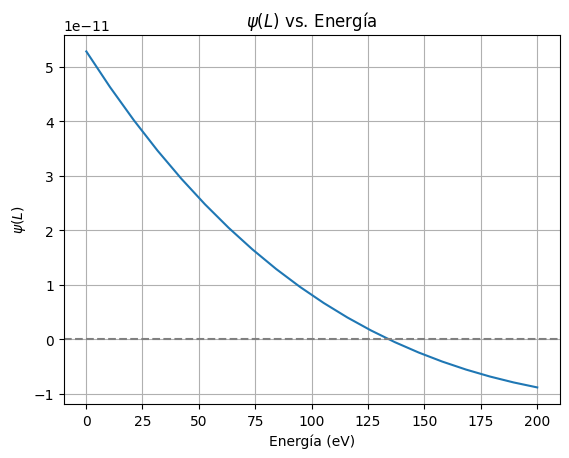

In [6]:
E_vals = np.linspace(0.1 * e, 200 * e, 20)
psi_vals = [solve(E, V1) for E in E_vals]

plt.plot(E_vals / e, psi_vals)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Energía (eV)')
plt.ylabel(r'$\psi(L)$')
plt.title(r'$\psi(L)$ vs. Energía')
plt.grid(True)
plt.show()


Notamos que cruza el eje entre 125 - 150 [eV]

### Resolviendo para $V1$

In [ ]:
# Busqueda de la energia del estado base usando el metodo de la secante
E1 = 125 * e
E2 = 150 * e 
E0_J = secante(lambda E: solve(E, V1), E1, E2, epsilon=1e-12)  # en Joules
E0_eV = E0_J / e  # conversión a eV

print(f"Energía del estado base: E = {E0_eV} eV")

Energía del estado base: E = 135.11866352085912 eV


### Resolviendo para $V2$

Graficamos previo a implementar el método de secante para elegir un intervalo adecuado sobre las energías para asegurar que $\psi(L)$ cruza el eje 

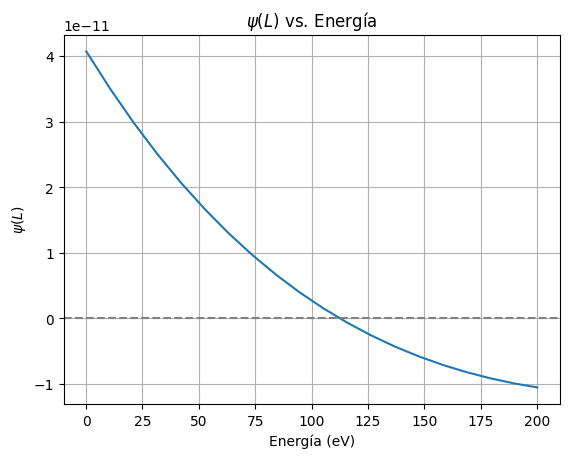

In [8]:
E_vals = np.linspace(0.1 * e, 200 * e, 20)
psi_vals = [solve(E, V2) for E in E_vals]

plt.plot(E_vals / e, psi_vals)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Energía (eV)')
plt.ylabel(r'$\psi(L)$')
plt.title(r'$\psi(L)$ vs. Energía')
plt.grid(True)
plt.show()


Notamos que cruza el eje entre 100 - 120 [eV]

In [9]:
# Busqueda de la energia del estado base usando el metodo de la secante
# Intervalos seleccionados
E1 = 100 * e
E2 = 125 * e 
E0_J = secante(lambda E: solve(E, V2), E1, E2, epsilon=1e-6)  # en Joules
E0_eV = E0_J / e  # conversión a eV

print(f"Energía del estado base: E = {E0_eV} eV")

Energía del estado base: E = 113.40668485797191 eV


In [10]:
%reset -f